In [1]:
%matplotlib inline

# 用Keras生成简单神经网络完成手写体识别

根据 **Author: Xavier Snelgrove** 翻译 

多伦多大学的简短Keras的手写体神经网络识别教程。 主要基于Keras源代码中的  `mnist_mlp.py` 案例

## 安装先决条件

参考以下顺序安装相关软件

### 安装Python

   Python3.6.x以下。 如果你安装了Python3.7，请删除，重新安装Python3.6

### 配置虚拟环境

    pip install virtualenv

    cd ~

    virtualenv kerasenv

windows下运行cmd，切换到虚拟环境

     kerasenv\Scripts\activate.bat
    
然后安装以下的包

    pip install numpy jupyter keras matplotlib tensorflow opencv-python
    

## 启动jupyter


    jupyter notebook

## 测试运行环境，运行后面的程序

请先切换到虚拟环境

kerasenv\Scripts\activate.bat

然后运行

jupyter notebook




In [2]:
import tensorflow as tf


## 开始建造神经网络

先导入一些必要的包

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## 导入训练数据,分类故意写成12而不是10，为添加字母X，-》做准备

In [4]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test0  original shape", X_test[0].shape)



X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test0  original shape (28, 28)


# 看一看训练用的数据长什么样

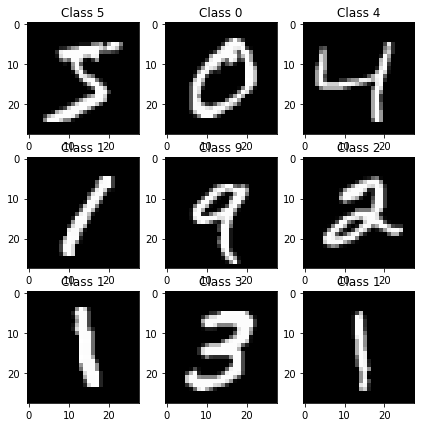

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## 练习：修改一下显示方式和数量

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


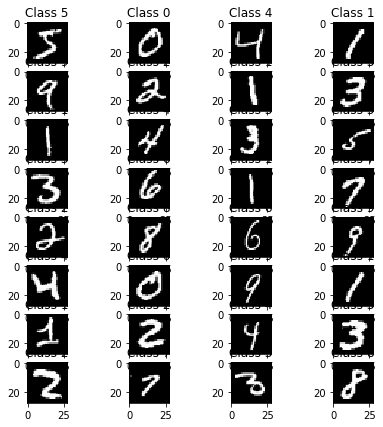

In [6]:
for line in X_train[0]:
    linestr=''
    for pix in line:
        linestr+=str(pix)+' '
    print(linestr) 

for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

print(y_train)

# 用OpenCV显示一下第一训练图

In [7]:
import cv2
Xtrain0=X_train[0]
cv2.imshow("mw",Xtrain0)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 数据格式整理

将28x28的图像变成单784的向量. 将输入归一化为0和1之间而不是0到255之间

In [8]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## 重新打印一下整理过的第一个字符数据看看效果

In [9]:
#print(X_train[0])

linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "




0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0

# 将目标矩阵修改为one-hot格式，即数字对应的是位置

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [10]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(len(Y_train))
print(len(Y_train[0]))
print(Y_train)
print(Y_test)

60000
12
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 建造神经元网络

简单3层全互联网络

<img src="figure.png" />

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## 编译模型

Keras建立在在Theano (也在TensorFlow)之上, 用Python定义计算图，然后编译为在CPU或GPU上高效运行的代码。

在编译时，Keras让你定义损失函数和优化器。我们这里用的损失函数称为 *categorical crossentropy*, 非常适合比较两个概率分布

我们预测10个数字的概率分布，(例如 我们80%确信图像为3, 10%确信是8, 5% 是2), 目标是正确的覆盖100%概率，0%则是其它

优化器帮助决定模型学习速度，如何抗拒粘滞或吹大。我们不在此讨论细节。一般用adam优化即可。

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## 训练模型！

This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [13]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 18s 303us/step - loss: 0.2564 - val_loss: 0.1017
Epoch 2/4
60000/60000 [==============================] - 17s 291us/step - loss: 0.1019 - val_loss: 0.0868
Epoch 3/4
60000/60000 [==============================] - 17s 290us/step - loss: 0.0712 - val_loss: 0.0732
Epoch 4/4
60000/60000 [==============================] - 17s 291us/step - loss: 0.0571 - val_loss: 0.0737TA


## 最后，评估性能，给出损失的值

In [14]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 2s 159us/step
0.07366474825022742


### 检查输出

看看正确的和错误的样本。记录正确和错误样本的序号

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

print(predicted_classes)
print(len(predicted_classes))

# Check which items we got right / wrong
predictyes=(predicted_classes == y_test)
print(predictyes)

predictnum=np.nonzero(predictyes)
print(predictnum)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("correct",correct_indices)
print("incorrect",incorrect_indices)


[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)
correct [   0    1    2 ... 9997 9998 9999]
incorrect [ 149  151  217  247  259  321  444  445  492  547  613  619  646  691
  717  720  740  844  846  900  947  951  956  965 1002 1014 1039 1182
 1224 1226 1232 1242 1247 1260 1289 1315 1319 1325 1326 1328 1337 1393
 1395 1414 1425 1522 1527 1530 1531 1549 1581 1609 1681 1717 1721 1722
 1800 1871 1901 1987 2004 2016 2040 2043 2053 2098 2109 2118 2135 2174
 2182 2266 2308 2387 2422 2433 2488 2514 2607 2618 2648 2654 2720 2730
 2877 2896 2921 2927 2939 2952 2953 2995 3073 3117 3225 3251 3289 3333
 3422 3451 3475 3490 3503 3520 3549 3558 3681 3718 3727 3769 3796 3808
 3811 3818 3869 3893 3906 3943 3976 3995 4007 4018 4065 4075 4078 4176
 4180 4212 4224 4248 4289 4294 4306 4350 4477 4497 4536 4601 4615 4635
 4639 4656 4740 4807 4814 4823 4876 4879 4880 4956 4966 4997 5067 5078
 5138 5140 5331 5457 5562 5573 560

# 分布画出正确和错误的识别前9个

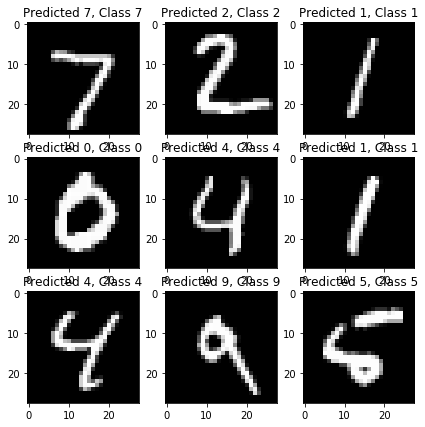

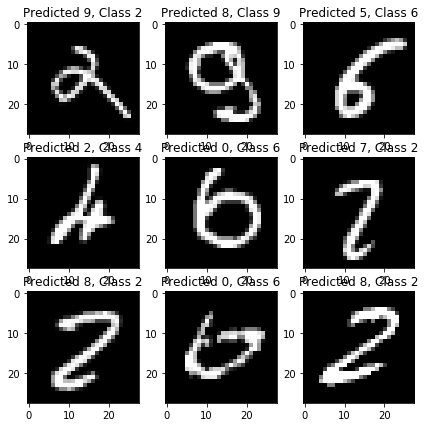

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# 自己手写8个数字，看看识别效果

![](handnumbers.jpg)

# 先切出来大小适中的图片

In [17]:
import cv2
import numpy as np

img=cv2.imread("handnumbers.jpg")
#cv2.imshow("mw",img)
#cv2.waitKey(0)
W=290
L=455
NW=280
NL=280
X0=125
Y0=160
for i in range(2):
    for j in range(4):
        imdig=img[X0+L*i:X0+L*i+NL,Y0+W*j:Y0+W*j+NW]
        cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(Y0+W*j,X0+L*i),(Y0+W*j+NW,X0+L*i+NL),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

# 变成黑白图片并反色

In [18]:
import cv2  

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg


#  查看第2行第2列的那个5的图

In [19]:
import cv2
img = cv2.imread("hn28inv11.jpg")
print(len(img))
print(len(img[0]))
cv2.imshow("hninv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


28
28


# 准备数据，将3通道彩色图变成1通道灰色图

x to be predicted original shape (28, 28, 3)
x to be predicted original shape (28, 28)


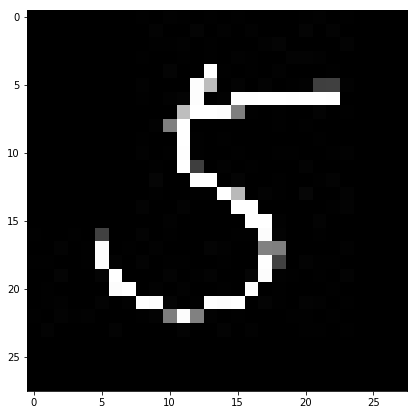

In [20]:
print("x to be predicted original shape", img.shape)
GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("x to be predicted original shape", GrayImg.shape)
plt.imshow(GrayImg, cmap='gray', interpolation='none')


# 数据格式整理

将28x28的图像变成单784的向量. 将输入归一化为0和1之间而不是0到255之间

In [21]:
X_pred = GrayImg.reshape(1, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Predicating matrix shape", X_pred.shape)

Predicating matrix shape (1, 784)


In [22]:
predicted_classes = model.predict_classes(X_pred)

print(predicted_classes)

[5]


# 一次性准备8个拍照得来的测试图像转化为784单列并归一化

In [23]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)



(8, 28, 28)


# 看看测试集长什么样，顺便生成标准答案以便比较

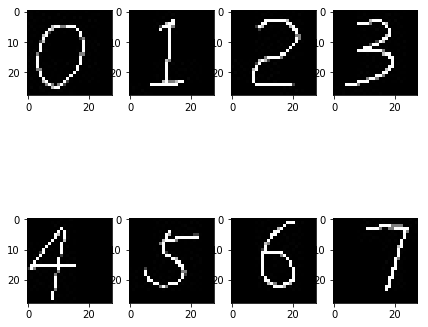

In [24]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

# 识别本次手动生成的测试集

In [25]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

Testing matrix shape (8, 784)
[3 5 2 3 4 5 6 6]


There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras

# 保存训练好的网络到文件

In [26]:
model.save("ministxkn.h5")

# 删除模型以便验证保存效果

In [27]:
del model

# 验证模型已删除

In [28]:
try:
    predicted_classes = model.predict_classes(X_pred)
except:
    print("model not found, you have deleted it on purpose.")
    

model not found, you have deleted it on purpose.


# 重新从文件里载入模型

In [29]:
from keras.models import load_model

model = load_model('ministxkn.h5')

# 用载入的模型再次预测数据

In [30]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[3 5 2 3 4 5 6 6]


# 将本次拍摄的图像修改入训练集

In [31]:
print(X_train.shape)
print(X_pred.shape)

(60000, 784)
(8, 784)


In [32]:
print(X_train[0:8])
print(X_pred[0:8])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [33]:
X_train[0:8]=X_pred

In [34]:
print(X_train[0:8])

[[0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [35]:
for i in range(8):
    y_train[i]=i

In [36]:
print(y_train[0:10])

[0 1 2 3 4 5 6 7 1 4]


In [37]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [38]:
print(Y_train[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# 再次训练模型

In [39]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 19s 319us/step - loss: 0.0450 - val_loss: 0.0745
Epoch 2/4
60000/60000 [==============================] - 20s 332us/step - loss: 0.0400 - val_loss: 0.0695
Epoch 3/4
60000/60000 [==============================] - 20s 335us/step - loss: 0.0329 - val_loss: 0.0658
Epoch 4/4
60000/60000 [==============================] - 20s 326us/step - loss: 0.0306 - val_loss: 0.0660


# 用再次训练的模型预测拍照值

In [40]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[0 1 2 3 4 5 6 7]


# 预测结果虽然看上去很完美，其实是因为预测集里的数据直接添加入了训练集，因此需要另一组手工图片验证是否真的有改善

![](handnumbers2.jpg)

# 切出大小适中照片然后预测

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg
(8, 28, 28)
Testing matrix shape (8, 784)
[9 1 8 3 4 5 6 3]


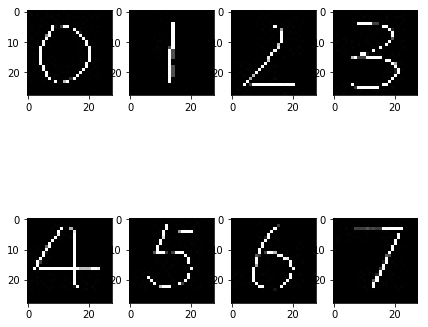

In [41]:
import cv2
import numpy as np

img=cv2.imread("handnumbers2.jpg")
imshow=img.copy()
#cv2.imshow("mw",img)
#cv2.waitKey(0)
W=375
L=490
NW=375
NL=490
X0=0
Y0=0
for i in range(2):
    for j in range(4):
        x1=X0+L*i
        y1=Y0+W*j
        x2=x1+NL
        y2=y1+NW
        imdig=img[x1:x2,y1:y2]
        cv2.imshow("imdig",imdig)
        cv2.waitKey()
        cv2.rectangle(imshow,(y1,x1),(y2,x2),(0,255,0),3)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.imwrite(filename,imdig)
cv2.imshow("imdigall",imshow)
cv2.waitKey()
cv2.destroyAllWindows()

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,100,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')
    
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

# 正确率确实有明显改善

# 后面训练字母X，先准备图像

![](xt8.jpg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg
(8, 28, 28)
Testing matrix shape (8, 784)
[10 10 10 10 10 10 10 10]


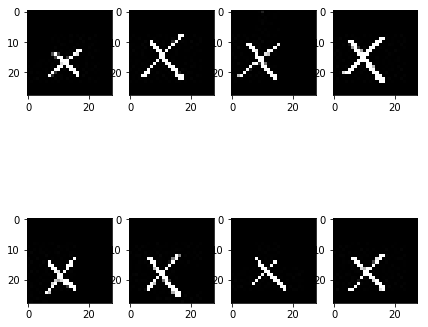

In [61]:
import cv2
import numpy as np

img=cv2.imread("xt8.jpg")
imshow=img.copy()
#cv2.imshow("mw",img)
#cv2.waitKey(0)
W=375
L=490
NW=375
NL=490
X0=0
Y0=0
for i in range(2):
    for j in range(4):
        x1=X0+L*i
        y1=Y0+W*j
        x2=x1+NL
        y2=y1+NW
        imdig=img[x1:x2,y1:y2]
        cv2.imshow("imdig",imdig)
        cv2.waitKey()
        cv2.rectangle(imshow,(y1,x1),(y2,x2),(0,255,0),3)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.imwrite(filename,imdig)
cv2.imshow("imdigall",imshow)
cv2.waitKey()
cv2.destroyAllWindows()

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,130,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')
    
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

# 前8个训练集标签设为10

In [62]:
for i in range(8):
    y_train[i]=10
print(y_train[0:10])
print(nb_classes)
Y_train = np_utils.to_categorical(y_train, nb_classes)
print(Y_train[0:10])


[10 10 10 10 10 10 10 10  1  4]
12
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# 前8个训练集改为X图片

In [63]:
X_train[0:8]=X_pred

# 重新训练

In [64]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 268us/step - loss: 0.0228 - val_loss: 0.0640
Epoch 2/4
60000/60000 [==============================] - 16s 263us/step - loss: 0.0180 - val_loss: 0.0744
Epoch 3/4
60000/60000 [==============================] - 15s 252us/step - loss: 0.0191 - val_loss: 0.0727
Epoch 4/4
60000/60000 [==============================] - 15s 255us/step - loss: 0.0178 - val_loss: 0.0777


# 看看预测效果

In [65]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[10 10 10 10 10 10 10 10]


# 这仍然是预测集进入了训练集造成的。换一张图看看效果

![](xt8_2.jpg)

# 切出大小适中照片然后预测

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg
(8, 28, 28)
Testing matrix shape (8, 784)
[ 4  8 10  4  9 10 10 10]


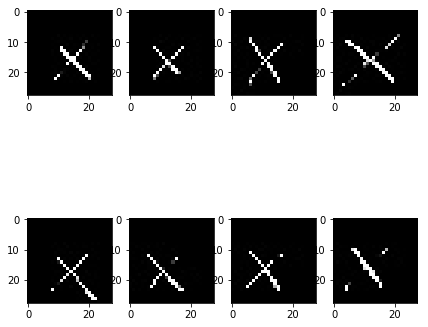

In [66]:
import cv2
import numpy as np

img=cv2.imread("xt8_2.jpg")
imshow=img.copy()
#cv2.imshow("mw",img)
#cv2.waitKey(0)
W=375
L=490
NW=375
NL=490
X0=0
Y0=0
for i in range(2):
    for j in range(4):
        x1=X0+L*i
        y1=Y0+W*j
        x2=x1+NL
        y2=y1+NW
        imdig=img[x1:x2,y1:y2]
        cv2.imshow("imdig",imdig)
        cv2.waitKey()
        cv2.rectangle(imshow,(y1,x1),(y2,x2),(0,255,0),3)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.imwrite(filename,imdig)
cv2.imshow("imdigall",imshow)
cv2.waitKey()
cv2.destroyAllWindows()

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')
    
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

# 在仅有8个训练集的情况下，测试正确率有40%，还是不错的